In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('data.csv')
# drop the last column bc not part of dataset
df = df.drop(df.columns[-1], axis=1)
df.head(5)


,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3


In [10]:
df.isna().sum() # no missing values

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

<h1> Prepare Data </h1>

In [11]:
# label
y = df['Purchase'].to_numpy()
# data
X = df.drop('Purchase', axis=1).to_numpy()


<h1> Data Scaling </h1>

In [12]:
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3)


<h1> Train and Test ML Model </h1>

In [13]:
lc = LogisticRegression() # logistic regression
svc = SVC(probability=True) # SVM
nbc = GaussianNB() # naive bayes
rfc = RandomForestClassifier() # random forest

lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.91      0.77      0.83        13

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.90      0.69      0.78        13

    accuracy                           0.83        30
   macro avg       0.85      0.82      0.82        30
weighted avg       0.84      0.83      0.83        30

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.90      0.69      0.78        13

    accuracy                           0.83        30
   macro avg       0.85      0.82      0.82        30
weighted avg       0.84      0.83      0.83        30

              preci

<h1> Display Model with Matrix and ROC Curve </h1>

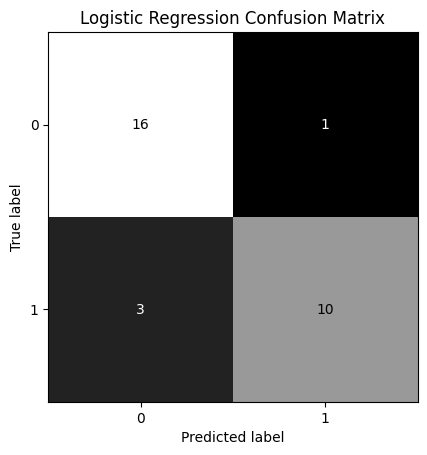

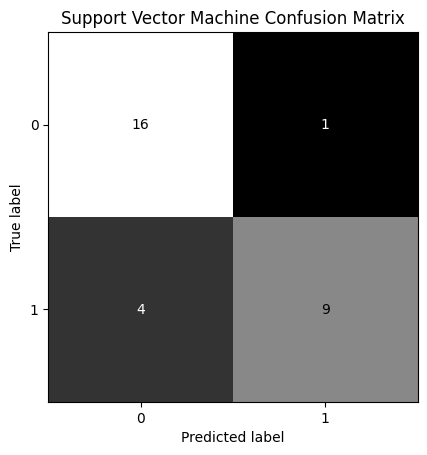

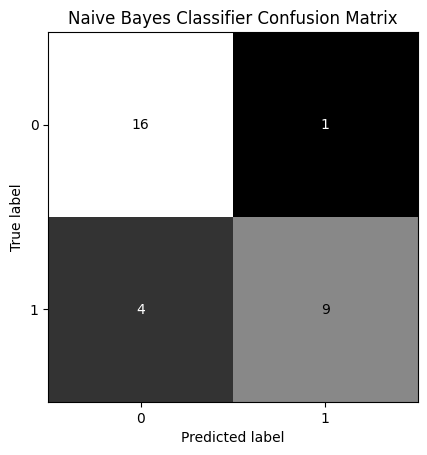

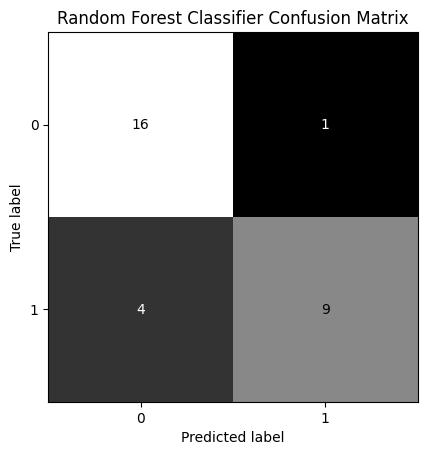

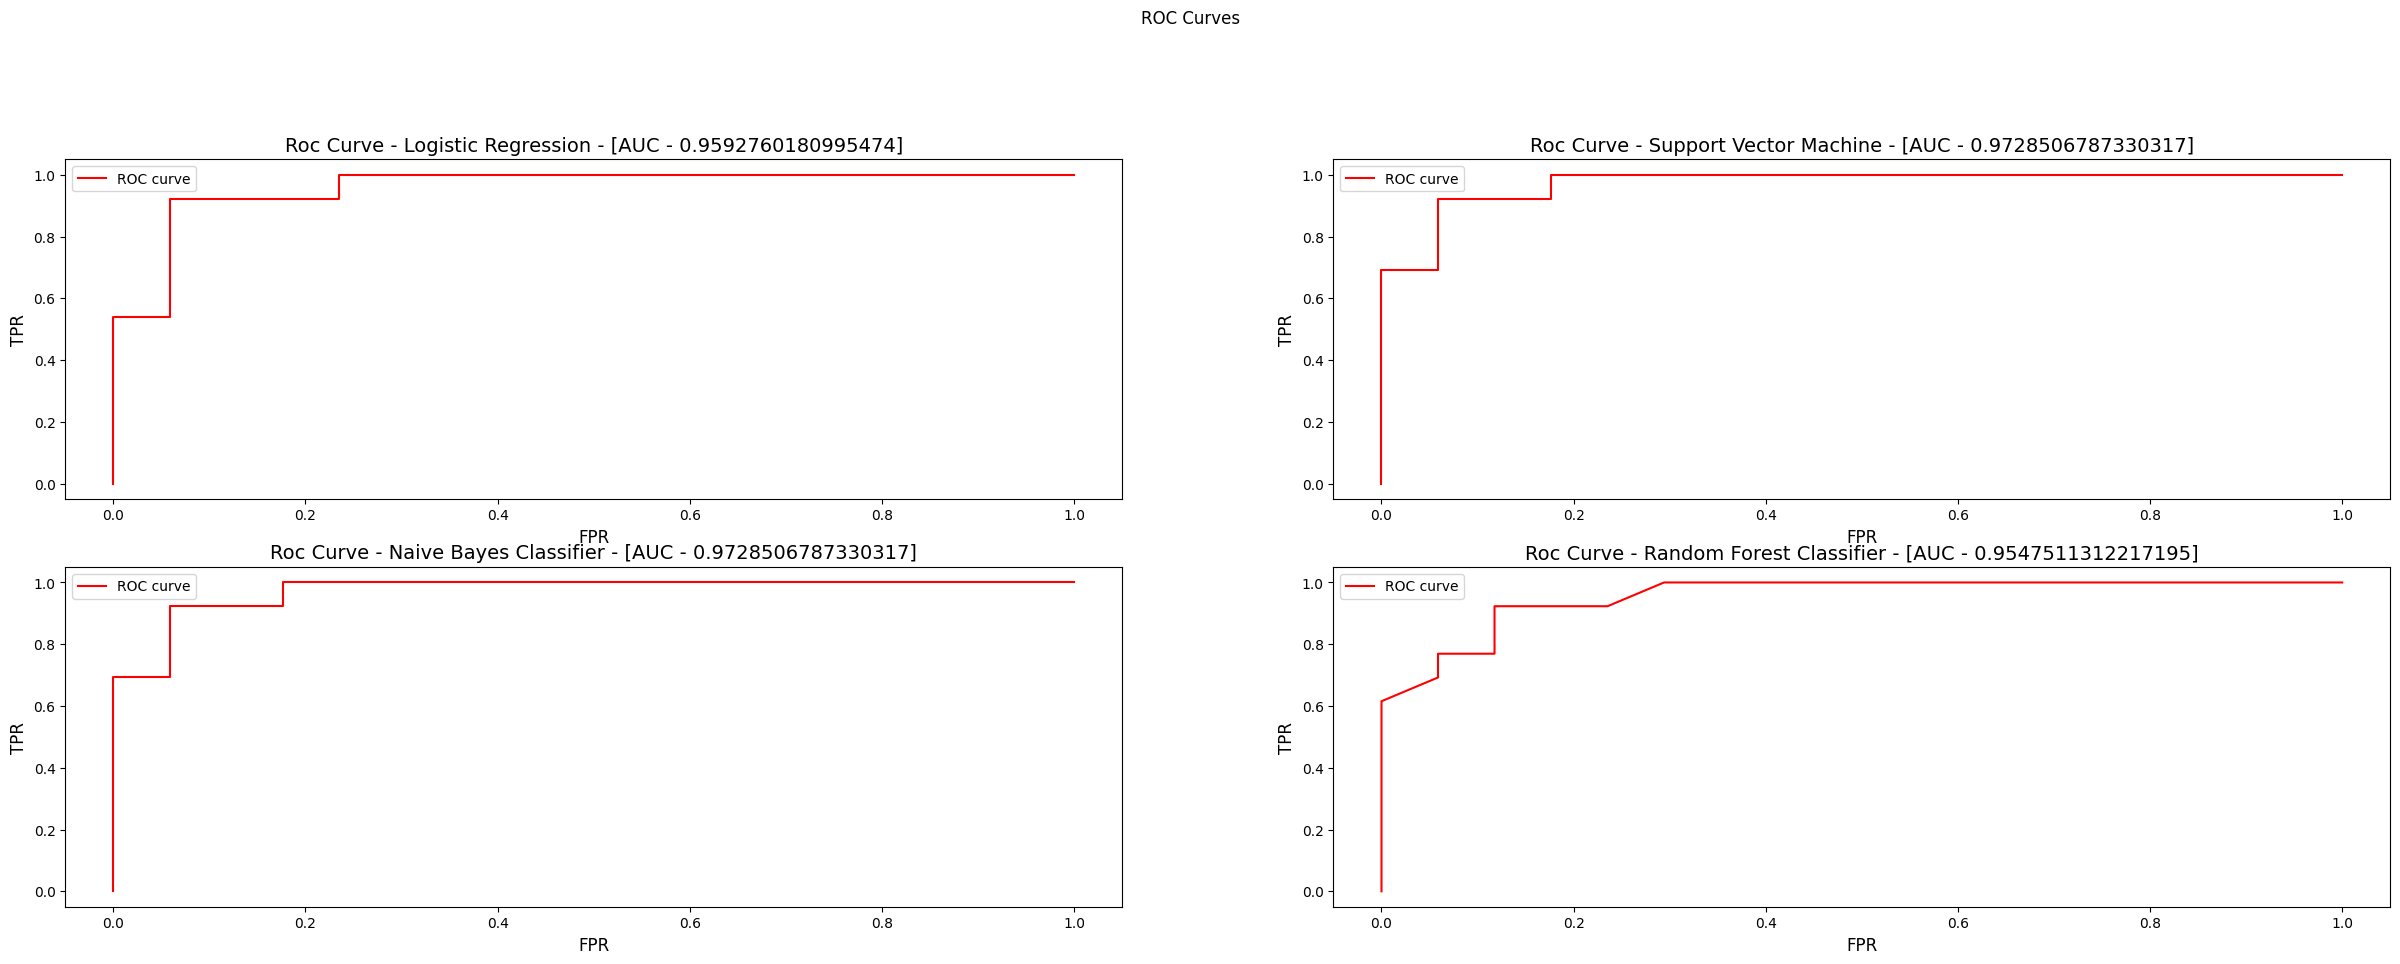

In [14]:
models = ['Logistic Regression', 'Support Vector Machine',
          'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()
